In [1]:
import importlib
import app 
importlib.reload(app) 

app.CountUniquePlayers()

Total unique players who logged in: 11080


11080

Date
2022-08-18    1343
2022-08-19    1821
2022-08-20    1723
2022-08-21    1687
2022-08-22    1633
              ... 
2023-03-27      97
2023-03-28      98
2023-03-29      62
2023-03-30      11
2023-03-31       4
Name: pid, Length: 226, dtype: int64


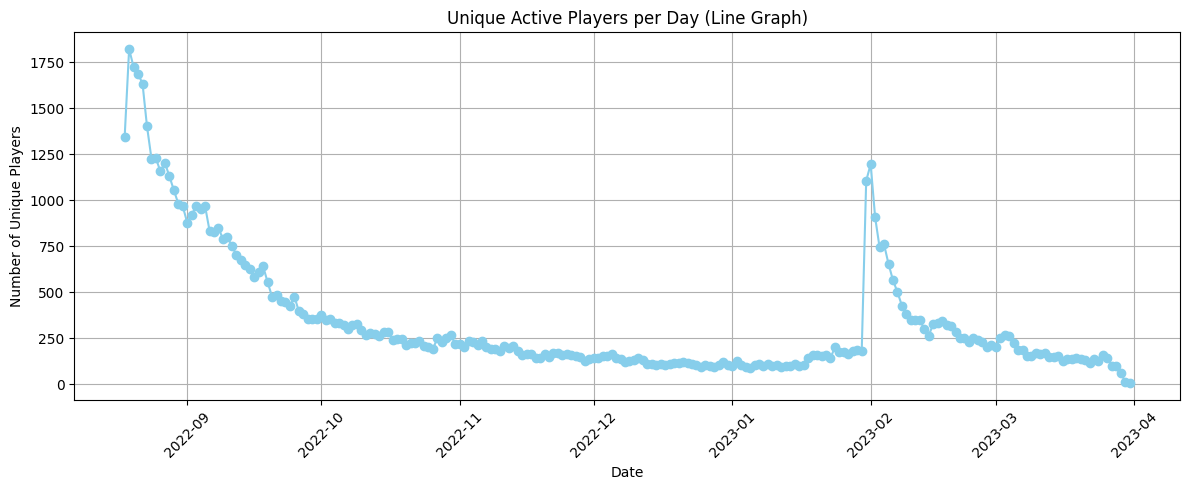

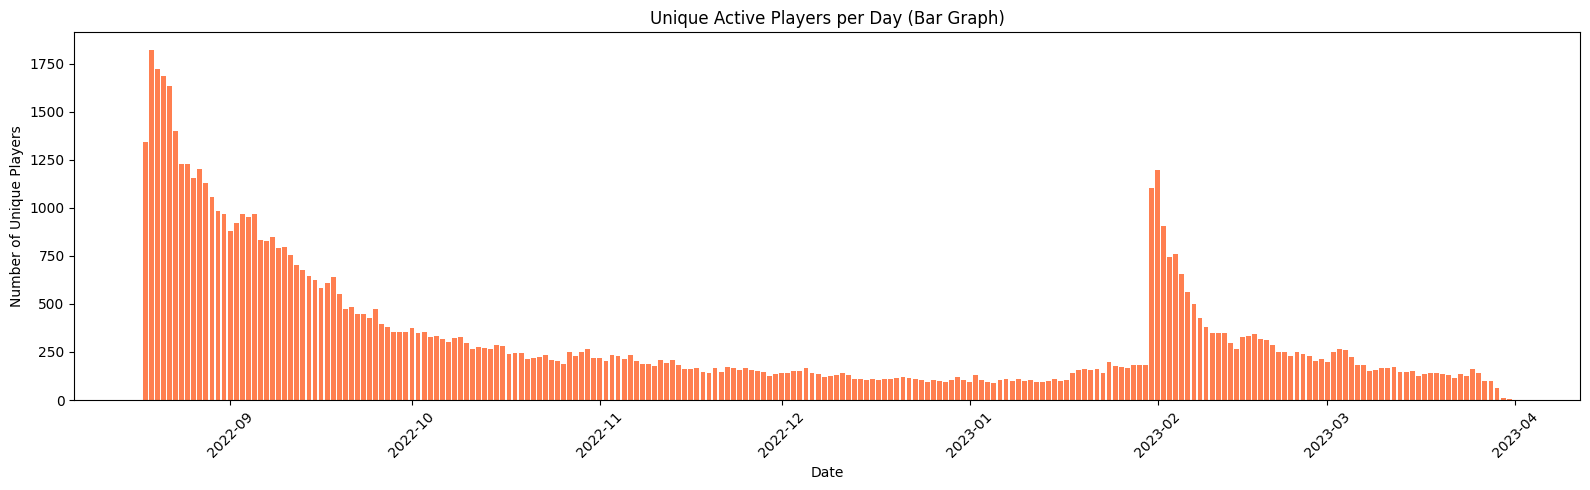

In [ ]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import app 
importlib.reload(app) 

auilyPlayers = app.DailyUniquePlayers()

plt.figure(figsize=(12, 5))
plt.plot(auilyPlayers.index, auilyPlayers.values, marker='o', color='skyblue')
plt.title('Unique Active Players per Day (Line Graph)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(auilyPlayers.index, auilyPlayers.values, color='coral')
plt.title('Unique Active Players per Day (Bar Graph)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Month
2022-08-01    6264
2022-09-01    4022
2022-10-01    2155
2022-11-01    1574
2022-12-01    1222
2023-01-01    2021
2023-02-01    4018
2023-03-01    1582
Freq: MS, Name: pid, dtype: int64


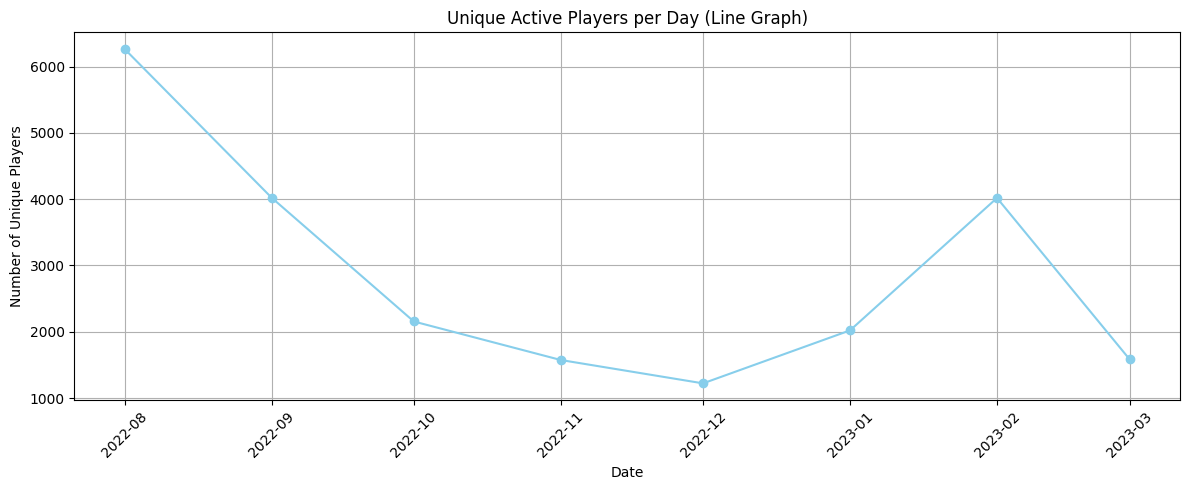

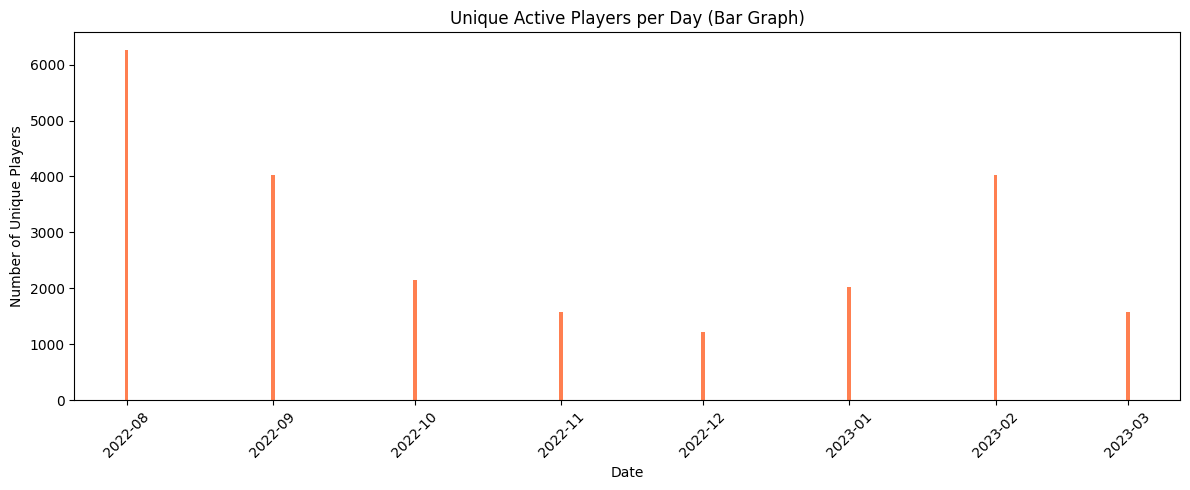

In [7]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import app 
importlib.reload(app) 

monthlyPlayers = app.MonthlyUniquePlayers()

plt.figure(figsize=(12, 5))
plt.plot(monthlyPlayers.index, monthlyPlayers.values, marker='o', color='skyblue')
plt.title('Unique Active Players per Day (Line Graph)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(monthlyPlayers.index, monthlyPlayers.values, color='coral')
plt.title('Unique Active Players per Day (Bar Graph)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Date
2022-08-18    1343
2022-08-19    1821
2022-08-20    1723
2022-08-21    1687
2022-08-22    1633
              ... 
2023-03-27      97
2023-03-28      98
2023-03-29      62
2023-03-30      11
2023-03-31       4
Name: pid, Length: 226, dtype: int64
Month
2022-08-01    6264
2022-09-01    4022
2022-10-01    2155
2022-11-01    1574
2022-12-01    1222
2023-01-01    2021
2023-02-01    4018
2023-03-01    1582
Freq: MS, Name: pid, dtype: int64


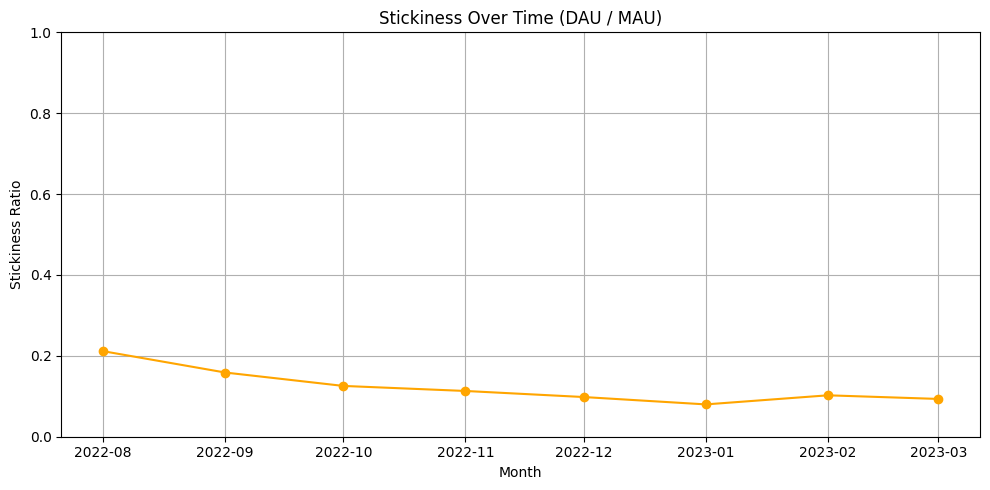

Date
2022-08-01    0.211560
2022-09-01    0.158760
2022-10-01    0.125619
2022-11-01    0.113130
2022-12-01    0.098147
2023-01-01    0.079935
2023-02-01    0.102405
2023-03-01    0.093451
Freq: MS, Name: pid, dtype: float64


In [ ]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import app 
importlib.reload(app) 


daily_unique = app.DailyUniquePlayers()
monthly_unique = app.MonthlyUniquePlayers()

average_dau_per_month = daily_unique.groupby(daily_unique.index.to_period('M')).mean()
average_dau_per_month.index = average_dau_per_month.index.to_timestamp()

stickiness = average_dau_per_month / monthly_unique


plt.figure(figsize=(10, 5))
plt.plot(stickiness.index, stickiness.values, marker='o', linestyle='-', color='orange')
plt.title('Stickiness Over Time (DAU / MAU)')
plt.xlabel('Month')
plt.ylabel('Stickiness Ratio')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

print(stickiness)

From the beginning of the game being released you can see players playing more often than towards the end as the life span of the game goes on.
You can see this indicated by how the stickiness value is going down as the months progress.
If the stickiness was to be high and stable that would indicate a consistent player base, but the drop off to below 0.2 indicated the player base falling off

Total sessions played: 105869
Median session time: 54.00 Minutes


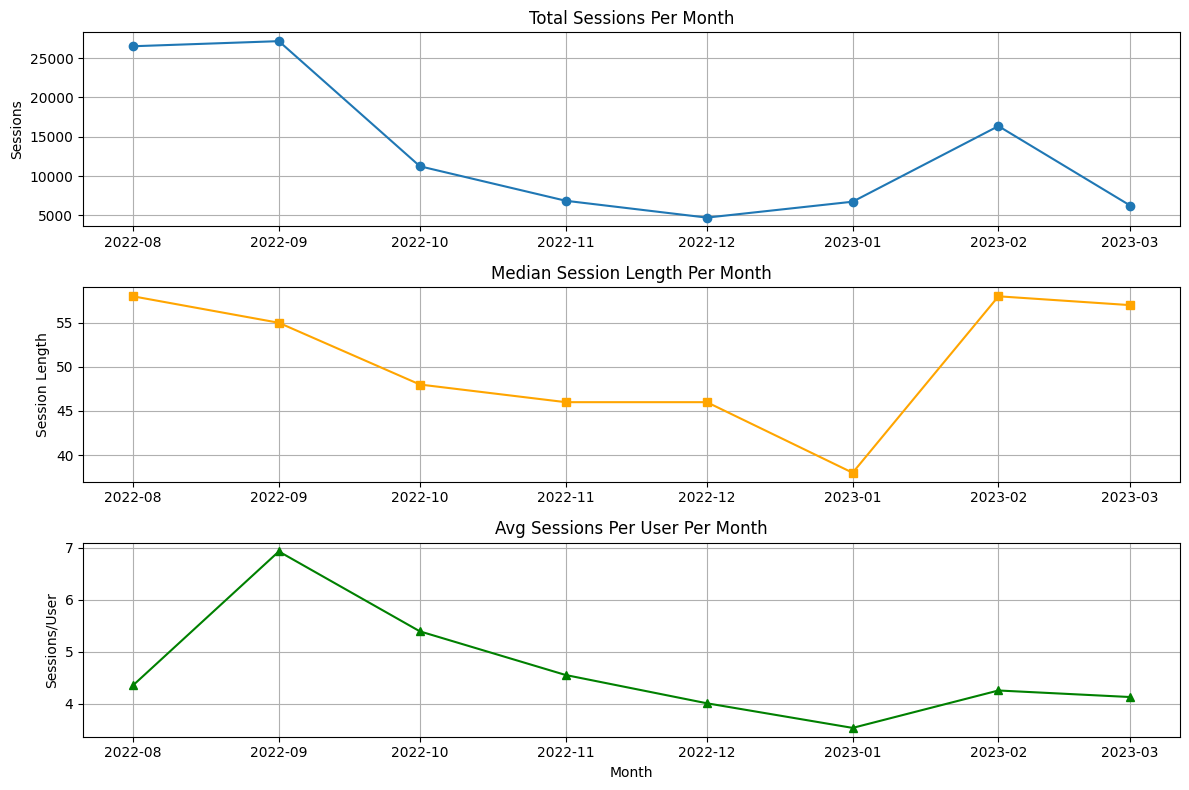

In [20]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import app 
importlib.reload(app) 

sessions = app.Sessions()

total_sessions = len(sessions)
print(f"Total sessions played: {total_sessions}")

median_session_time = sessions['CurrentSessionLength'].median()
print(f"Median session time: {median_session_time:.2f} Minutes")


sessions['Month'] = sessions['Time'].dt.to_period('M')

sessions_per_user_month = sessions.groupby(['Month', 'pid']).size()
avg_sessions_per_user_month = sessions_per_user_month.groupby('Month').mean()

sessions_per_month = sessions.groupby('Month').size()


median_session_length_month = sessions.groupby('Month')['CurrentSessionLength'].median()

sessions_per_month.index = sessions_per_month.index.to_timestamp()
median_session_length_month.index = median_session_length_month.index.to_timestamp()
avg_sessions_per_user_month.index = avg_sessions_per_user_month.index.to_timestamp()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(sessions_per_month.index, sessions_per_month.values, marker='o')
plt.title("Total Sessions Per Month")
plt.ylabel("Sessions")
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(median_session_length_month.index, median_session_length_month.values, marker='s', color='orange')
plt.title("Median Session Length Per Month")
plt.ylabel("Session Length")
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(avg_sessions_per_user_month.index, avg_sessions_per_user_month.values, marker='^', color='green')
plt.title("Avg Sessions Per User Per Month")
plt.ylabel("Sessions/User")
plt.xlabel("Month")
plt.grid(True)

plt.tight_layout()
plt.show()

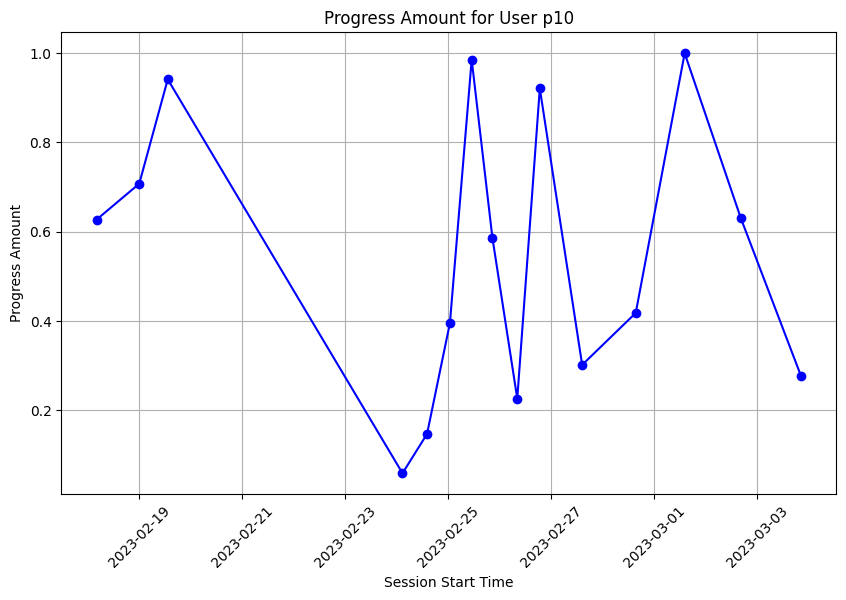

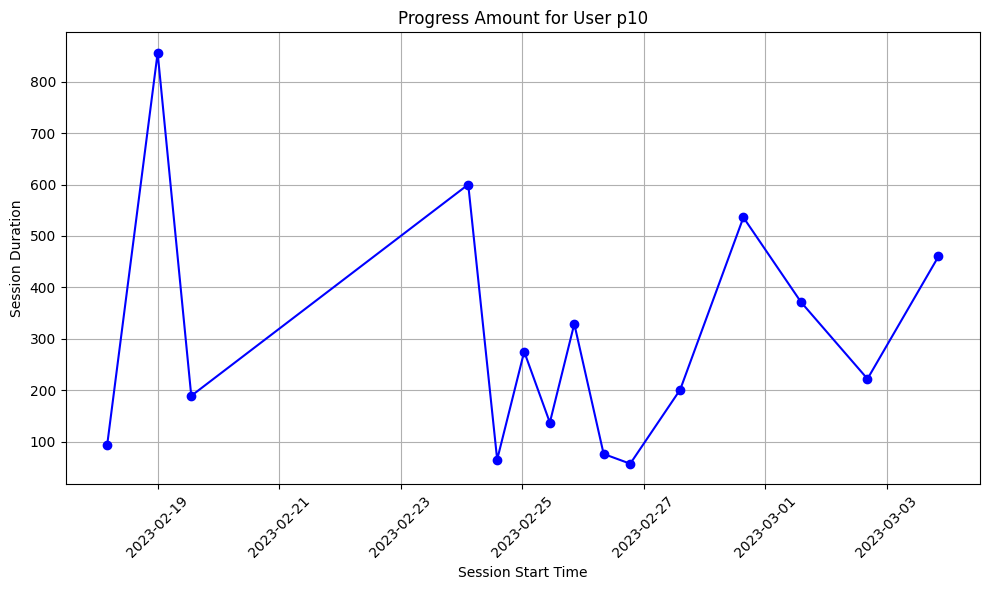

In [69]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import app
importlib.reload(app)


df = app.ProgressData()

user_data = df[df['pid'] == 'p10']

plt.figure(figsize=(10, 6))
plt.plot(user_data['LoginTime'], user_data['ProgressAmount'], marker='o', linestyle='-', color='b')

plt.title('Progress Amount for User p10')
plt.xlabel('Session Start Time')
plt.ylabel('Progress Amount')
plt.xticks(rotation=45)
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(user_data['LoginTime'], user_data['SessionDuration'], marker='o', linestyle='-', color='b') #.dt.strftime('%H:%M')

plt.title('Progress Amount for User p10')
plt.xlabel('Session Start Time')
plt.ylabel('Session Duration')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


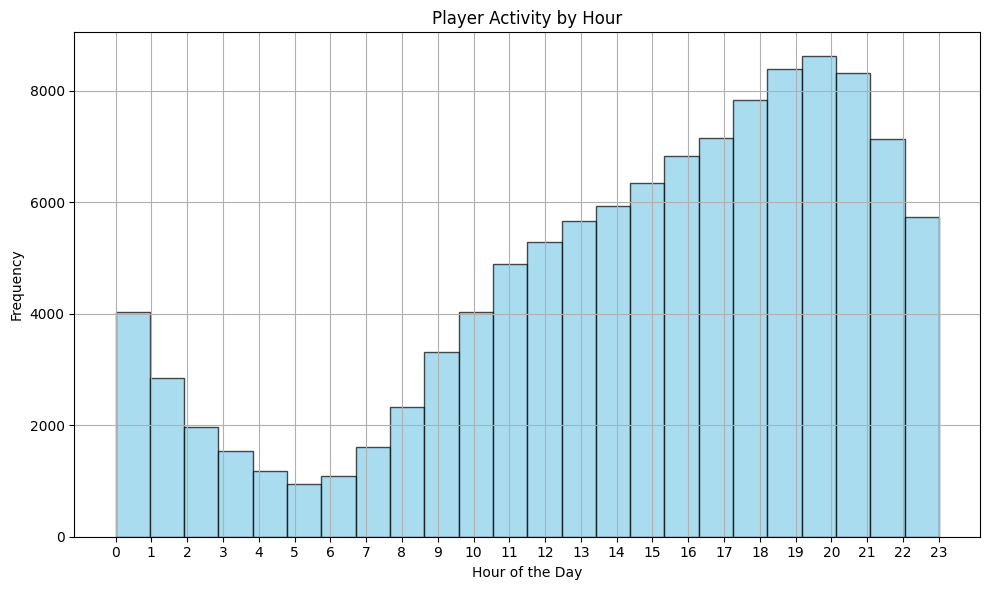

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('part3/player_logged_in.csv')

df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = df['Time'].dt.hour

plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Player Activity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.grid(True)

plt.tight_layout()
plt.show()




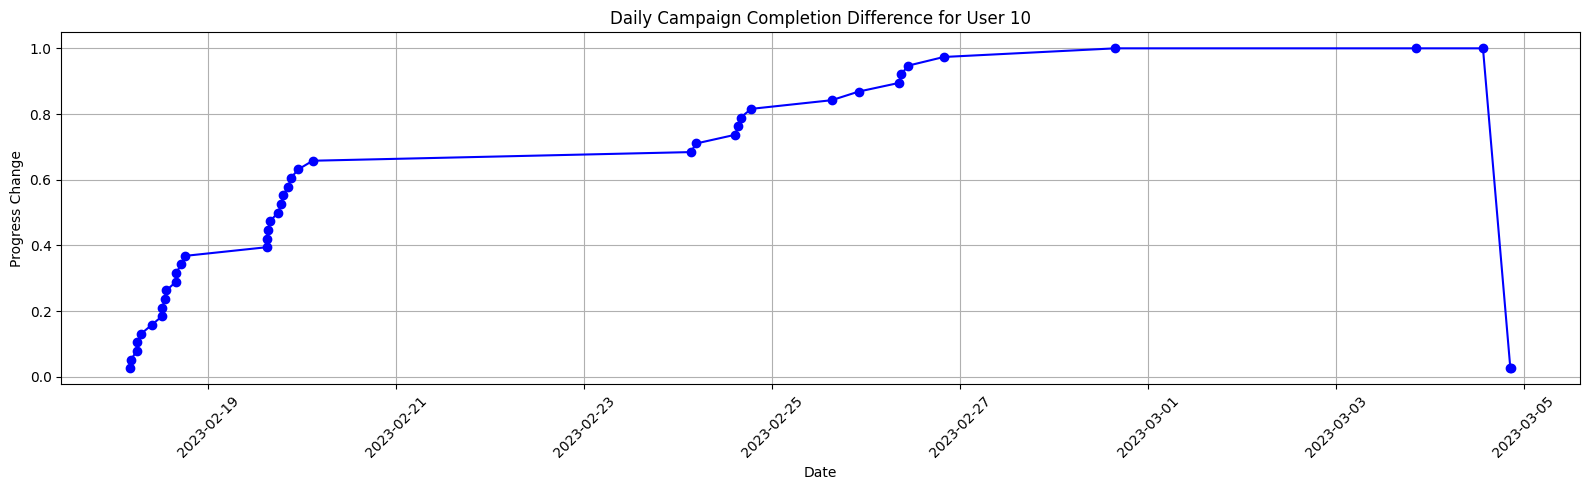

In [78]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import app
importlib.reload(app)


df = app.NumberOfCompletedTasks()

user_data = df[df['pid'] == 'p10']

# Plot the difference
plt.figure(figsize=(16, 5))
plt.plot(user_data['Time'], user_data['ProgressAmount'], marker='o', linestyle='-', color='b')
plt.title(f"Daily Campaign Completion Difference for User 10")
plt.xlabel("Date")
plt.ylabel("Progress Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()